# Unsupervised Learning: Clustering Lab





In [10]:
from scipy.cluster.vq import kmeans
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1) 

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [11]:
import requests, io
# K-means with Abalone
url = "https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff"
response = requests.get(url)
data, meta = arff.loadarff(io.StringIO(response.text))

abalone = pd.DataFrame(data)

In [12]:

for i in range(3):
    kmeans_abalone = KMeans(n_clusters=3, init='random', n_init=1)
    kmeans_abalone.fit(abalone)
    kmeans_abalone.predict(abalone)
    print("\nClass labels for each point:")
    print(kmeans_abalone.labels_)
    print(f"\nCluster centers (k=3):")
    print(kmeans_abalone.cluster_centers_)
    print(f"\nNumber of iterations to converge: {kmeans_abalone.n_iter_}")
    print(f"Total SSE (inertia): {kmeans_abalone.inertia_:.4f}")
    print(f"Silhouette score: {silhouette_score(abalone, kmeans_abalone.labels_):.4f}")




Class labels for each point:
[0 2 1 1 2 2 0 0 1 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 2 0
 2 1 1 1 0 2 2 2 2 1 2 2 1 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1 0 1 2 0 2 0 1
 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 2 2 1 2 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 0 2 2 2 2 2 0 0 0 1 2 2 2 2 2 1 1 1 1 1 0 1 1 1 1 1
 2 2 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 2 2 2 2 2 2 2 2 1 0 0 1 1 1
 0 1 1 1 1 0 1 0 2 1 1 1 0 0 1]

Cluster centers (k=3):
[[ 0.61092593  0.4837963   0.16916667  1.2580463   0.48016667  0.25992593
   0.42623148 15.46296296]
 [ 0.52295699  0.41080645  0.1388172   0.76        0.30589247  0.17220968
   0.24027419 10.23655914]
 [ 0.37518868  0.28754717  0.09283019  0.31228302  0.13264151  0.07159434
   0.09832075  6.79245283]]

Number of iterations to converge: 4
Total SSE (inertia): 529.2543
Silhouette score: 0.5184

Class labels for each point:
[0 2 1 1 2 2 0 0 1 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 2 0
 2 1 1 1 0 2 2 2 2 1 2 2 1 2 2 1 1 2 2

In [13]:
k_vals = [2,3,4,5,7]
for k in k_vals:
    kmeans_abalone = KMeans(n_clusters=k, init='random', n_init=1)
    kmeans_abalone.fit(abalone)
    kmeans_abalone.predict(abalone)
    print("\nClass labels for each point:")
    print(kmeans_abalone.labels_)
    print(f"\nCluster centers (k={k}):")
    print(kmeans_abalone.cluster_centers_)
    print(f"\nNumber of iterations to converge: {kmeans_abalone.n_iter_}")
    print(f"Total SSE (inertia): {kmeans_abalone.inertia_:.4f}")
    print(f"Silhouette score: {silhouette_score(abalone, kmeans_abalone.labels_):.4f}")


Class labels for each point:
[0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1]

Cluster centers (k=2):
[[ 0.60415493  0.4778169   0.16704225  1.21399296  0.46203521  0.25330986
   0.40896479 14.63380282]
 [ 0.45437984  0.35383721  0.11709302  0.53466667  0.22172481  0.12295349
   0.16694961  8.58914729]]

Number of iterations to converge: 6
Total SSE (inertia): 914.7338
Silhouette score: 0.5818

Class labels for each point:
[2 1 1 1 1 1 0 0 1 0 2 1 2 1 1 2 1 1 1 1 2 1 2 1 1 2 2 2 2 2 1 2 0 0 2 1 0
 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 0 2
 2 2 1 1 2 2 1 2 0 0 2 2 2 1 1 2 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 2

#### Discussion
Discuss your results. Run it a few times. What happens? How did the cluster silhouette scores compare? <br>
Now play around with k. What happens to the clusters and silhouette scores?

I ran it three times, the first time it took 4 iterations to converge, the second 7 and the third 5. It was interesting that the silhouette score was the same for all three fittings.

When playing around with k I decided to have the values be, 2,3,4,5,7. When using k=7 we had the highest amount of iterations to convergence and we had the lowest silhouette score at k=5. it's interesting that as k increases, SSE decreases.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC) 

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [14]:
# HAC with Abalone
hac_abalone = AgglomerativeClustering(n_clusters=3, linkage='complete')
hac_abalone.fit(abalone)
print("Labels for each point:")
print(hac_abalone.labels_)
print("Silhouette score: ", silhouette_score(abalone, hac_abalone.labels_))

Labels for each point:
[1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0]
Silhouette score:  0.5398112398376158


#### Discussion
How do the clusters compare to your results above? Explain the differences using what you know about HAC.

When running the k-means model, I would have to include a random state in order to get the same results; interestingly enough, with HAC, you don't have to do that as you will get the same answer each time you run the model.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [15]:
# K-means initial centroid experiments
url_iris = "https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff"
response_iris = requests.get(url_iris)
data_iris, meta_iris = arff.loadarff(io.StringIO(response_iris.text))
iris = pd.DataFrame(data_iris)
X_iris = iris.iloc[:, :-1]

In [16]:
results = []
for i in range(5):
    km = KMeans(n_clusters=4, init='random', n_init=1, random_state=i)
    km.fit(X_iris)
    sil_score = silhouette_score(X_iris, km.labels_)
    results.append((km.inertia_, sil_score))
    print(f"Run {i+1}: Inertia={km.inertia_:.4f}, Silhouette={sil_score:.4f}")

print("\nUsing n_init=10 (runs 10 times, returns best):")
km_multi = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
km_multi.fit(X_iris)
sil_multi = silhouette_score(X_iris, km_multi.labels_)
print(f"Best result: Inertia={km_multi.inertia_:.4f}, Silhouette={sil_multi:.4f}")

print("\nUsing K-means++ initialization (n_init=1):")
km_plus = KMeans(n_clusters=4, init='k-means++', n_init=1, random_state=42)
km_plus.fit(X_iris)
sil_plus = silhouette_score(X_iris, km_plus.labels_)
print(f"Result: Inertia={km_plus.inertia_:.4f}, Silhouette={sil_plus:.4f}")


Run 1: Inertia=57.3715, Silhouette=0.4974
Run 2: Inertia=71.3404, Silhouette=0.4171
Run 3: Inertia=57.3454, Silhouette=0.4972
Run 4: Inertia=57.3454, Silhouette=0.4972
Run 5: Inertia=57.4733, Silhouette=0.4951

Using n_init=10 (runs 10 times, returns best):
Best result: Inertia=57.3179, Silhouette=0.4978

Using K-means++ initialization (n_init=1):
Result: Inertia=57.4403, Silhouette=0.4974


#### Discussion
Discuss your results. How does n_init work and compare with your first results without using n_init. <br>
How does K-means++ work? Compare it to your previous runs.

I think it is interesting that the silhoutte score for all of these results are very similiar. When looking at the results however, it makes me wonder why you wouldn't want to just use the K-means++ algorithm each time so that you could get a baseline and then have the n_init run to find scores that are better than the score that you got from the K-means++. This makes me question the validity of simply running the model and not just using K-means++.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

In [17]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

k=2: SSE=152.3687, Silhouette=0.6808


/Users/sethfrandsen/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


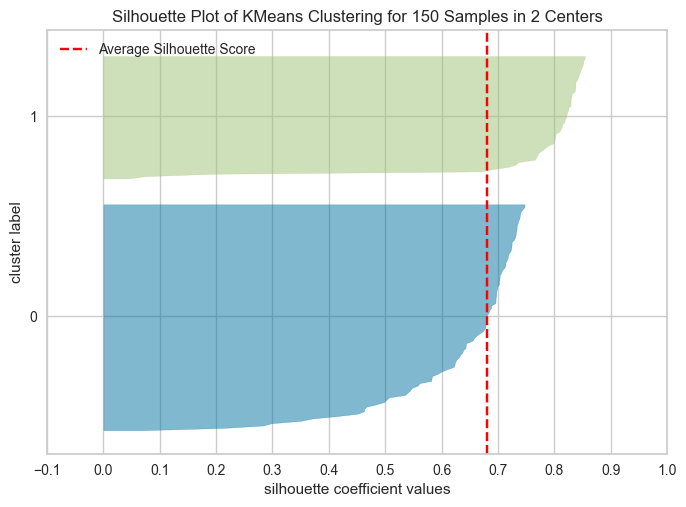

k=3: SSE=78.9408, Silhouette=0.5526


/Users/sethfrandsen/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


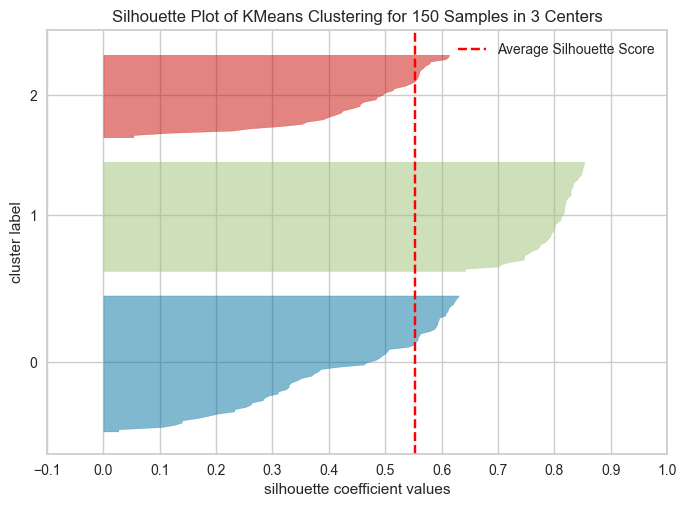

k=4: SSE=57.3179, Silhouette=0.4978


/Users/sethfrandsen/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


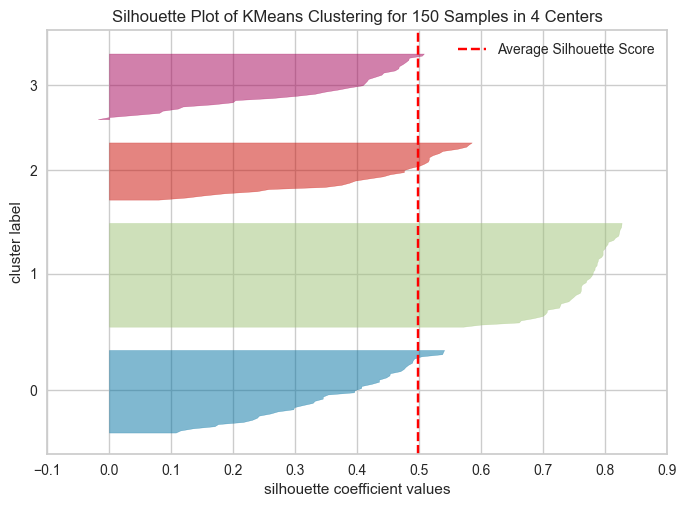

k=5: SSE=46.5356, Silhouette=0.4885


/Users/sethfrandsen/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


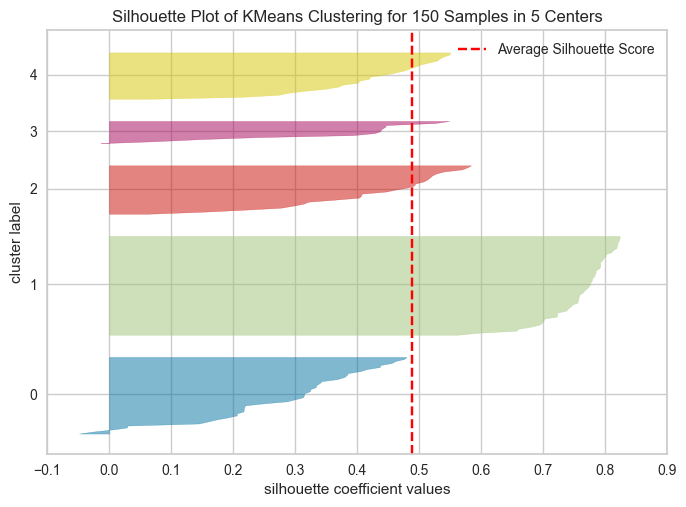

k=6: SSE=38.9310, Silhouette=0.3682


/Users/sethfrandsen/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


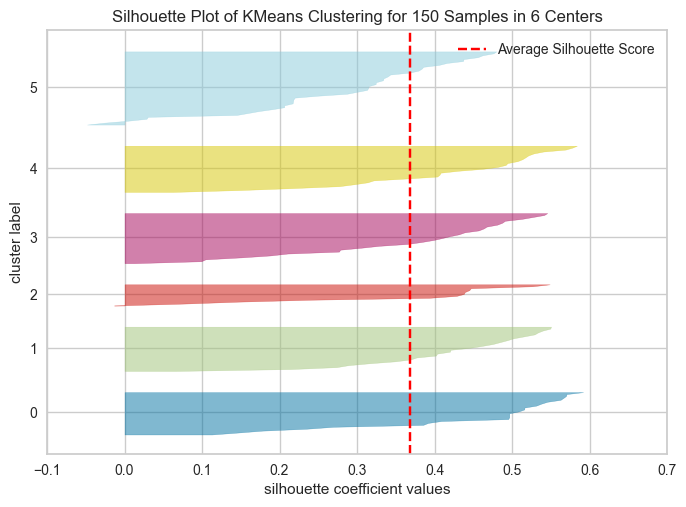

In [18]:
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_iris)
    sil_score = silhouette_score(X_iris, km.labels_)
    print(f"k={k}: SSE={km.inertia_:.4f}, Silhouette={sil_score:.4f}")
    SilhouetteVisualizer(km, colors='yellowbrick').fit(X_iris).poof()

#### Discussion
Discuss your results and justify which clustering is best based on the silhouette graphs

I would argue that the best results can be found when useing k=3, this is because it gives us the best average silhouette score while also taking into account SSE. when k=3 we have a silhoutte score of .55 and SSE of 78.94. Although this has a much higher SSE score than that of k=5 or k=6, when we look at the silhoutte scores associated with those k values, the argument for those k vaules begins to diminish. k=3 gives us a good balance point between SSE and silhoutte score.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [19]:
#HAC with Iris
linkage_types = ['single', 'average', 'complete', 'ward']
results_table = []

for linkage in linkage_types:
    row = [linkage]
    for k in range(2, 7):
        hac = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        hac_labels = hac.fit_predict(X_iris)
        sil_score = silhouette_score(X_iris, hac_labels)
        row.append(f"{sil_score:.4f}")
    results_table.append(row)

pd.DataFrame(results_table, columns=['Linkage'] + [f"k={k}" for k in range(2, 7)])


,Linkage,k=2,k=3,k=4,k=5,k=6
0,single,0.6864,0.5118,0.2818,0.2835,0.2211
1,average,0.6864,0.5539,0.4717,0.4303,0.3407
2,complete,0.5161,0.5134,0.4996,0.3500,0.3421
3,ward,0.6864,0.5541,0.4887,0.4842,0.3619


#### Discussion
Discuss your results and compare with your k-means results. <br>
Discuss your table that contains the silhouette scores for k=2,3,4,5,6 and for each of the different linkage options. <br>
Discuss how the linkage options affect your scores.

looking and comparing the different linkage type with the same k value, for all but k=4 we see that the score is relatively close. For k=4, we see that single linkage is outperformed by all others. When we look at k=3, this is the value in which all of the linkage options are similar and within a few points of each other. Looking at all the k-values, we see a decrease among all the different linkage types for values greater than 3. This would be a strong indicator that there are 3 different groups in our dataset and that k=3 would be the optimal value.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

In [20]:
# Run both algoriths on a data set of your choice
from sklearn .datasets import load_wine
wine = load_wine()
X_wine = wine.data
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [21]:
k_results = []
for k in [2,3,4,5]:
    km = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    km.fit(X_wine)
    sil_score = silhouette_score(X_wine, km.labels_)
    print(f"k={k}: SSE={km.inertia_:.4f}, Silhouette={sil_score:.4f}")
    k_results.append((k, sil_score))


k=2: SSE=4543749.6145, Silhouette=0.6569
k=3: SSE=2370689.6868, Silhouette=0.5711
k=4: SSE=1341379.5701, Silhouette=0.5587
k=5: SSE=916379.1872, Silhouette=0.5490


In [22]:
hac_results = []
for k in [2,3,4,5]:
    hac = AgglomerativeClustering(n_clusters=k, linkage='complete')
    hac_labels = hac.fit_predict(X_wine)
    sil_score = silhouette_score(X_wine, hac_labels)
    print(f"k={k}: Silhouette={sil_score:.4f}")
    hac_results.append((k, sil_score))

k=2: Silhouette=0.6413
k=3: Silhouette=0.5419
k=4: Silhouette=0.5336
k=5: Silhouette=0.4806


In [23]:
for k in [2,3,4,5]:
    hac = AgglomerativeClustering(n_clusters=k, linkage='single')
    hac_labels = hac.fit_predict(X_wine)
    sil_score = silhouette_score(X_wine, hac_labels)
    print(f"k={k}: Silhouette={sil_score:.4f}")
    hac_results.append((k, sil_score))

k=2: Silhouette=0.5394
k=3: Silhouette=0.4880
k=4: Silhouette=0.3935
k=5: Silhouette=-0.0263


In [24]:
for k in [2,3,4,5]:
    hac = AgglomerativeClustering(n_clusters=k, linkage='average')
    hac_labels = hac.fit_predict(X_wine)
    sil_score = silhouette_score(X_wine, hac_labels)
    print(f"k={k}: Silhouette={sil_score:.4f}")
    hac_results.append((k, sil_score))

k=2: Silhouette=0.6587
k=3: Silhouette=0.6101
k=4: Silhouette=0.5296
k=5: Silhouette=0.5458


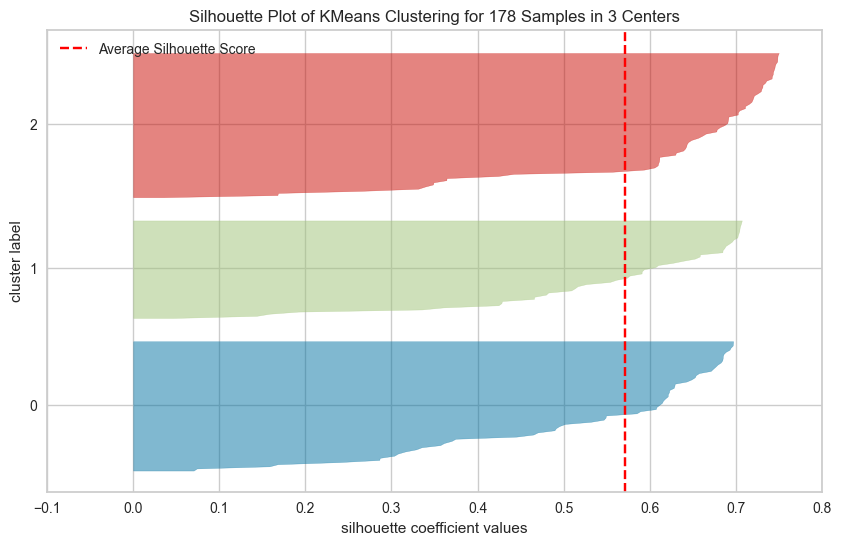

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
import matplotlib.pyplot as plt
km_wine_vis = KMeans(n_clusters=3, n_init=10, random_state=42)
fig, ax = plt.subplots(figsize=(10, 6))
visualizer = SilhouetteVisualizer(km_wine_vis, colors='yellowbrick', ax=ax)
visualizer.fit(X_wine)
visualizer.show()

In [28]:
import numpy as np
HAC_avg = np.mean(hac_results)
K_avg = np.mean(k_results)
print(f"HAC average: {HAC_avg}")
print(f"Kmeans average: {K_avg}")

HAC average: 1.997345824402976
Kmeans average: 2.041962514535783


#### Discussion 
Discuss your results and compare the algorithms you used. Which worked best? How do you know? Base your discussion on what you know about the algorithms and the hyperparameters and scoring methods. Why would you choose either algorithm?

For the wine dataset, the Kmeans worked better than the HAC model but only slightly, for this reason, I would choose the Kmeans model. The kmeans model is faster
and works better for larger datasets, the HAC model is slower and works better for smaller datasets. I would use the Kmeanas model in this case because
I could add more data to the dataset and still get good results while also having the model be fast. One final reason that I would use the kmeans
model instead of the HAC model would be that with the kmeans model, we can also calculate an SSE value that helps us to better interpret the effectiveness/accuracy of the model. It can also help us to determine the best value of k to use. For the K values that we use in this lab, we also get a higher average silhouette score for the Kmeans model than the HAC model. When comparing the HAC models with different linkage types, the single linkage gave us the worst results and the complete linkage gave us the best results, even though it was still below the silhoutte scores for the kmeans model.


## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm 
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm 

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

#### Discussion
Discussion and comparision of each model implemented

** Your discussion goes here **

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass

In [ ]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        
    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass